In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import sqlite3

def execute_sql(query):
    return sqldf(query, globals())

# Описание полей

- `timestamp` -- дата и время поста 
<br>
- `company` -- название компании
<br>
- `level` -- уровень специалиста (jun - mid - senior etc)
<br>
- `title` -- название вакансии 
<br>
- `totalyearlycompensation` -- годовая заработная плана. в контексте всех последующих задач, именно это поле будет иметься в виду под названием "зарплата"
<br>
- `location` -- город и штат\страна, где работает специалист
<br>
- `yearsofexperience` -- уровень специалиста
<br>
- `yearsatcompany` -- опыт работы специалиста 
<br>
- `basesalary` -- базовая компенсация
<br>



In [4]:
df = pd.read_csv('P01_Salaries_Dataset - P01_Salaries_Dataset.csv', index_col = 0)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp']

0       2017-06-07 11:33:27
1       2017-06-10 17:11:29
2       2017-06-11 14:53:57
3       2017-06-17 00:23:14
4       2017-06-20 10:58:51
                ...        
69995   2020-06-16 15:16:13
69996   2021-02-24 20:56:27
69997   2021-01-04 20:52:36
69998   2020-12-01 17:03:09
69999   2021-07-16 07:43:01
Name: timestamp, Length: 70000, dtype: datetime64[ns]

Вам необходимо будет проделать несколько задач по датасету, в удобном для вас формате -- либо используя **методы pandas**, либо **через SQL-код**

# Задачи

1. Сколько уникальных компаний находятся в топ 10 по сумме годовых заработной платы `totalyearlycompensation`?
1. Какой средний опыт работы у `Software Engineers` в компании `Oracle` с заработной платой больше `50.000`?
1. Каковы средние зарплаты по локациям `Austin, TX`, `London, EN, United Kingdom` и `Redmond, WA`
1. Какова средняя зарплата в целом в штате Калифорния? `(CA)`

1. Сравните заработные платы компаний "FAANG" против остальных компаний в разрезе позиции `Software Engineer`

1. Сравните среднюю, медиану и моду по заработным платам у `Software Engineers` за периоды 
  `январь 2021 - апрель 2021`  vs `май 2021 - август 2021` (включительно)
1. Визуализируйте данные с предыдущего задания линейным графиком, где должны быть соблюдены следующие условия:
    - Период январь-апрель должен быть зеленого цвета
    - Период май-август должен быть красного цвета
    - на линейном графике должны присутствовать только средние значения (mean)

1. Оцените влияние уровня образования (или его отсутствия) к заработной плате

1. Оцените _зависимость_ между опытом работы `yearsofexperience` и заработной платой

1. Сделайте сравнение уровня зарплат в зависимости от грэйда (level) в компании Amazon на позицию 'Software Engineer'. Постройте визуализацию и **напишите ваши выводы**. [Подробнее о грэйдах в Amazon](https://careerkarma.com/blog/software-engineering-salary-amazon/), [примеры исследования позиций и зарплат в Казахстане](https://zerttey.kolesa.group/datascience#zp)

In [62]:
sql_query = """
SELECT *
FROM df
LIMIT 100
"""
execute_sql(sql_query)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:27.000000,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,None,107000.0,20000.0,10000.0,None,None,None
1,2017-06-10 17:11:29.000000,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,None,0.0,0.0,0.0,None,None,None
2,2017-06-11 14:53:57.000000,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,None,155000.0,0.0,0.0,None,None,None
3,2017-06-17 00:23:14.000000,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,None,157000.0,180000.0,35000.0,None,None,None
4,2017-06-20 10:58:51.000000,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,None,0.0,0.0,0.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-11-15 10:25:44.000000,Amazon,L4,Software Engineer,148000,"Sunnyvale, CA",1.0,1.0,None,0.0,0.0,0.0,None,None,None
96,2017-11-16 18:40:36.000000,Google,L4,Software Engineer,273000,"Sunnyvale, CA",1.0,1.0,None,131000.0,112000.0,30000.0,None,None,None
97,2017-11-18 12:46:06.000000,Microsoft,63,Software Engineer,240000,"Redmond, WA",6.0,1.0,None,150700.0,120000.0,40000.0,None,None,None
98,2017-11-20 14:46:22.000000,Google,L4,Software Engineer,268000,"Mountain View, CA",5.0,3.5,None,142000.0,100000.0,26000.0,None,None,None


### Сколько уникальных компаний находятся в топ 10 по сумме годовых заработной платы totalyearlycompensation?

In [79]:
sql_query = """
SELECT COUNT(DISTINCT company) AS unique_companies
FROM df
WHERE totalyearlycompensation IN (
    SELECT DISTINCT totalyearlycompensation
    FROM df
    ORDER BY totalyearlycompensation DESC
    LIMIT 10
);
"""
execute_sql(sql_query)

,unique_companies
0,6


### Какой средний опыт работы у Software Engineers в компании Oracle с заработной платой больше 50.000?

In [33]:
sql_query = """
SELECT AVG(yearsofexperience) AS avg_experience
FROM df
WHERE company = 'Oracle' 
AND title = 'Software Engineer'
AND totalyearlycompensation > 50000;
"""
execute_sql(sql_query)

,avg_experience
0,7.959698


### Каковы средние зарплаты по локациям Austin, TX, London, EN, United Kingdom и Redmond, WA

In [39]:
sql_query = """
SELECT location, AVG(totalyearlycompensation) AS avg_totalyearlycompensation
FROM df
WHERE location IN ('Austin, TX', 'London, EN, United Kingdom', 'Redmond, WA')
GROUP BY location
"""
execute_sql(sql_query)

,location,avg_totalyearlycompensation
0,"Austin, TX",179809.164733
1,"London, EN, United Kingdom",171934.554974
2,"Redmond, WA",225076.573072


### Какова средняя зарплата в целом в штате Калифорния? (CA)

In [40]:
sql_query = """
SELECT AVG(totalyearlycompensation) AS avg_salary
FROM df
WHERE location LIKE '%CA%';

"""
execute_sql(sql_query)

,avg_salary
0,258244.112948


### Сравните заработные платы компаний "FAANG" против остальных компаний в разрезе позиции Software Engineer

In [81]:
sql_query = """
SELECT 
  CASE WHEN company IN ('Facebook','facebook', 'Apple','apple', 'Amazon','amazon', 'Netflix','netflix', 'Google', 'google') THEN 'FAANG' ELSE 'Other' END AS company_type,
  AVG(totalyearlycompensation) AS avg_salary
FROM df
WHERE title = 'Software Engineer'
GROUP BY company_type;

"""
execute_sql(sql_query)

,company_type,avg_salary
0,FAANG,255686.211440
1,Other,186129.053767


### Сравните среднюю, медиану и моду по заработным платам у Software Engineers за периоды январь 2021 - апрель 2021 vs май 2021 - август 2021 (включительно)

In [51]:

df_jan_apr = df[(df['timestamp'] >= '2021-01-01') & (df['timestamp'] <= '2021-04-30') & (df['title'] == 'Software Engineer')]
df_may_aug = df[(df['timestamp'] >= '2021-05-01') & (df['timestamp'] <= '2021-08-31') & (df['title'] == 'Software Engineer')]

mean_jan_apr = df_jan_apr['totalyearlycompensation'].mean()
mode_jan_apr = df_jan_apr['totalyearlycompensation'].mode().values[0]
median_jan_apr = df_jan_apr['totalyearlycompensation'].median()

mean_may_aug = df_may_aug['totalyearlycompensation'].mean()
mode_may_aug = df_may_aug['totalyearlycompensation'].mode().values[0]
median_may_aug = df_may_aug['totalyearlycompensation'].median()

print('Mean for January-April:', mean_jan_apr)
print('Mode for January-April:', mode_jan_apr)
print('Median for January-April:', median_jan_apr)
print('Mean for May-August:', mean_may_aug)
print('Mode for May-August:', mode_may_aug)
print('Median for May-August:', median_may_aug)


Mean for January-April: 199110.9127692491
Mode for January-April: 150000
Median for January-April: 175000.0
Mean for May-August: 186914.53712632594
Mode for May-August: 150000
Median for May-August: 165000.0


### Визуализируйте данные с предыдущего задания линейным графиком, где должны быть соблюдены следующие условия:
    - Период январь-апрель должен быть зеленого цвета
    - Период май-август должен быть красного цвета
    - на линейном графике должны присутствовать только средние значения (mean)

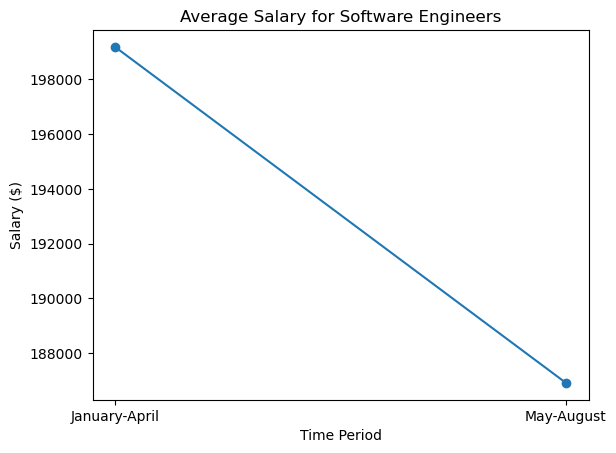

In [54]:
plt.plot(['January-April', 'May-August'], [mean_jan_apr, mean_may_aug], marker='o')
plt.title('Average Salary for Software Engineers')
plt.xlabel('Time Period')
plt.ylabel('Salary ($)')
plt.show()



### Оцените влияние уровня образования (или его отсутствия) к заработной плате

In [63]:
df_ed = df[['totalyearlycompensation', 'Education']]
df_ed['Education'].fillna('No Education', inplace=True)

education_grouped = df_ed.groupby('Education')['totalyearlycompensation'].agg(['mean', 'median', pd.Series.mode])

print('\nWage by education level:')
education_grouped


Wage by education level:


C:\Users\Tuf\AppData\Local\Temp\ipykernel_21996\742457445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ed['Education'].fillna('No Education', inplace=True)


,mean,median,mode
Education,,,
Bachelor's Degree,178092.821606,156000.0,150000
Highschool,187741.573034,162000.0,150000
Master's Degree,220304.590679,195000.0,200000
No Education,225524.078191,195000.0,200000
PhD,292860.465116,255000.0,250000
Some College,210747.524752,172500.0,120000


In [68]:
sql_query = """
SELECT COALESCE(NULLIF(Education, ''), 'No Education') AS EducationLevel,
       AVG(totalyearlycompensation) AS AverageCompensation
FROM df
GROUP BY COALESCE(NULLIF(Education, ''), 'No Education')
ORDER BY AverageCompensation DESC
"""
execute_sql(sql_query)

,EducationLevel,AverageCompensation
0,PhD,292860.465116
1,No Education,225524.078191
2,Master's Degree,220304.590679
3,Some College,210747.524752
4,Highschool,187741.573034
5,Bachelor's Degree,178092.821606


### Оцените _зависимость_ между опытом работы `yearsofexperience` и заработной платой

In [5]:
data = df[['yearsofexperience', 'totalyearlycompensation']]

correlation = data['yearsofexperience'].corr(data['totalyearlycompensation'])
correlation

0.42390702842580535

### Сделайте сравнение уровня зарплат в зависимости от грэйда (level) в компании Amazon на позицию 'Software Engineer'. Постройте визуализацию и напишите ваши выводы. Подробнее о грэйдах в Amazon, примеры исследования позиций и зарплат в Казахстане

C:\Users\Tuf\AppData\Local\Temp\ipykernel_17868\4217550733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['level'] = df_filtered['level'].replace({'SDE I': 'L4', 'SDE II': 'L5', 'SDE III': 'L6'})


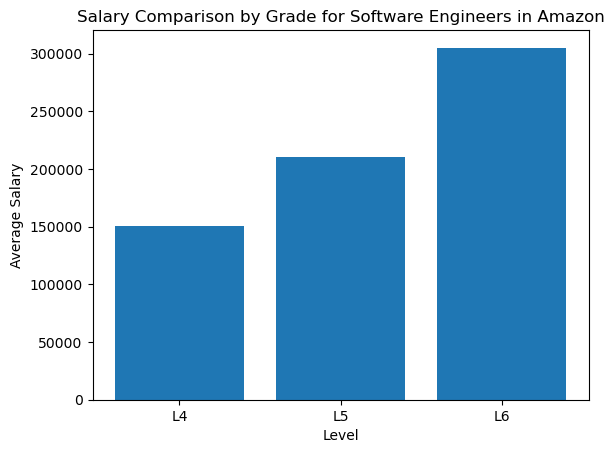

In [57]:
# Step 1: Filter and clean the dataset
df_filtered = df[(df['title'] == 'Software Engineer') & df['level'].notnull() & ((df['company'] == 'Amazon') | (df['company'] == 'amazon'))]

# Step 2: Replace 'SDE I', 'SDE II', 'SDE III' with 'L4', 'L5', 'L6'
df_filtered['level'] = df_filtered['level'].replace({'SDE I': 'L4', 'SDE II': 'L5', 'SDE III': 'L6'})


# Step 3: Group data by 'level' and calculate average salary
average_salary = df_filtered.groupby('level')['totalyearlycompensation'].mean()

# Step 4: Define the grade levels and their respective labels
grade_levels = ['L4', 'L5', 'L6']

# Step 5: Reindex the average salary data to include all grade levels
average_salary = average_salary.reindex(grade_levels)

# Step 6: Plot the data
plt.bar(grade_levels, average_salary)
plt.xlabel('Level')
plt.ylabel('Average Salary')
plt.title('Salary Comparison by Grade for Software Engineers in Amazon')
plt.show()

In [58]:
average_salary

level
L4    150264.577259
L5    209938.195777
L6    305029.325513
Name: totalyearlycompensation, dtype: float64

C:\Users\Tuf\AppData\Local\Temp\ipykernel_17868\1660808996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['level'] = df_filtered['level'].replace({'SDE I': 'L4', 'SDE II': 'L5', 'SDE III': 'L6'})


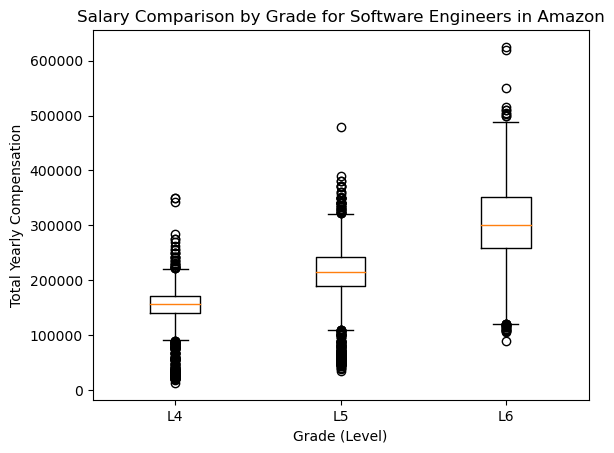

level
L4    150264.577259
L5    209938.195777
L6    305029.325513
Name: totalyearlycompensation, dtype: float64

In [61]:
df_filtered = df[(df['title'] == 'Software Engineer') & df['level'].notnull() & ((df['company'] == 'Amazon') | (df['company'] == 'amazon'))]

df_filtered['level'] = df_filtered['level'].replace({'SDE I': 'L4', 'SDE II': 'L5', 'SDE III': 'L6'})

grade_levels = ['L4', 'L5', 'L6']

data = [df_filtered[df_filtered['level'] == level]['totalyearlycompensation'] for level in grade_levels]

plt.boxplot(data, labels=grade_levels)
plt.xlabel('Grade (Level)')
plt.ylabel('Total Yearly Compensation')
plt.title('Salary Comparison by Grade for Software Engineers in Amazon')
plt.show()

average_salary = df_filtered.groupby('level')['totalyearlycompensation'].mean().reindex(grade_levels)
median_salary = df_filtered.groupby('level')['totalyearlycompensation'].median().reindex(grade_levels)



In [62]:
average_salary

level
L4    150264.577259
L5    209938.195777
L6    305029.325513
Name: totalyearlycompensation, dtype: float64

In [63]:
median_salary

level
L4    156000.0
L5    215000.0
L6    300000.0
Name: totalyearlycompensation, dtype: float64